In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/employee_data.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


### Preprocessing
- Replace the "Height" column with random numbers between 150 and 180.

In [20]:
# Replace the "Height" column with random numbers between 150 and 180
np.random.seed(42)  # For reproducibility
df['Height'] = np.random.randint(150, 181, size=len(df))

# Ensure data consistency and integrity
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0


# Analysis Tasks
1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [11]:
# Distribution of employees across each team
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100
team_percentage

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

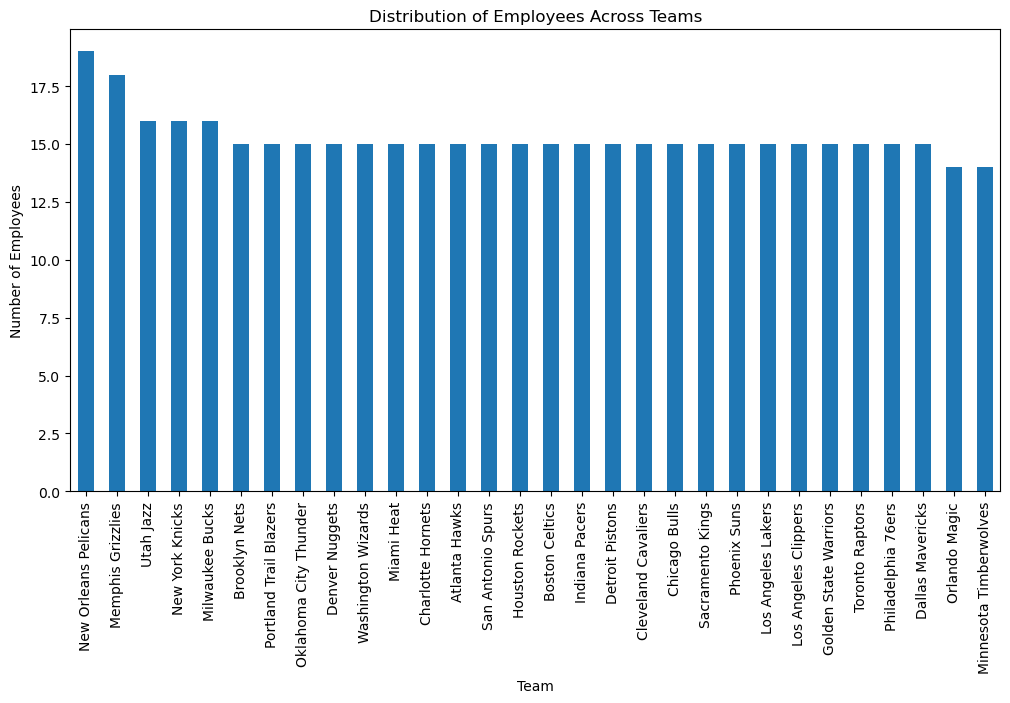

In [14]:
# Plot the distribution
plt.figure(figsize=(12,6))
team_distribution.plot(kind='bar')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()

2. Segregate employees based on their positions within the company.


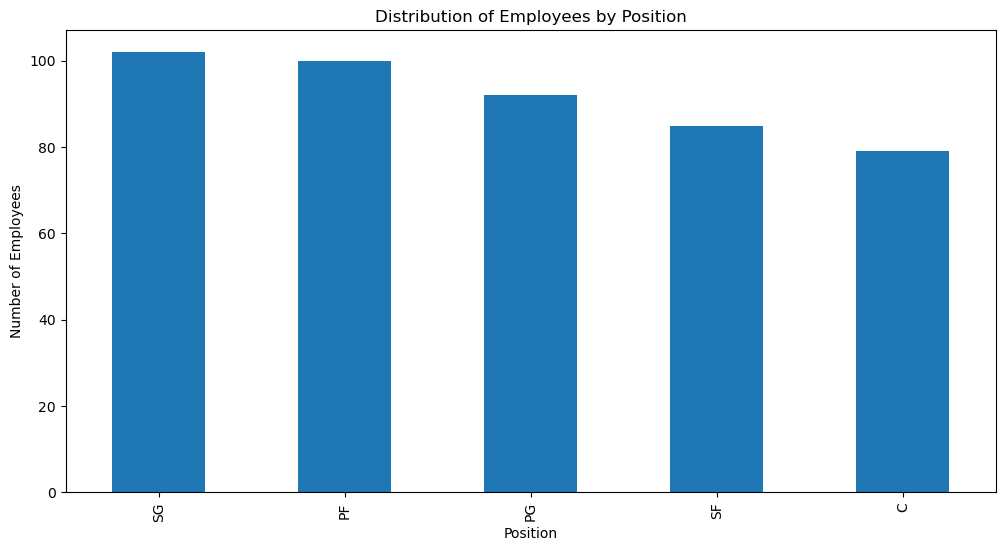

In [15]:
# Segregate employees based on their positions
position_distribution = df['Position'].value_counts()

# Plot the distribution
plt.figure(figsize=(12,6))
position_distribution.plot(kind='bar')
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()

3. Identify the predominant age group among employees.

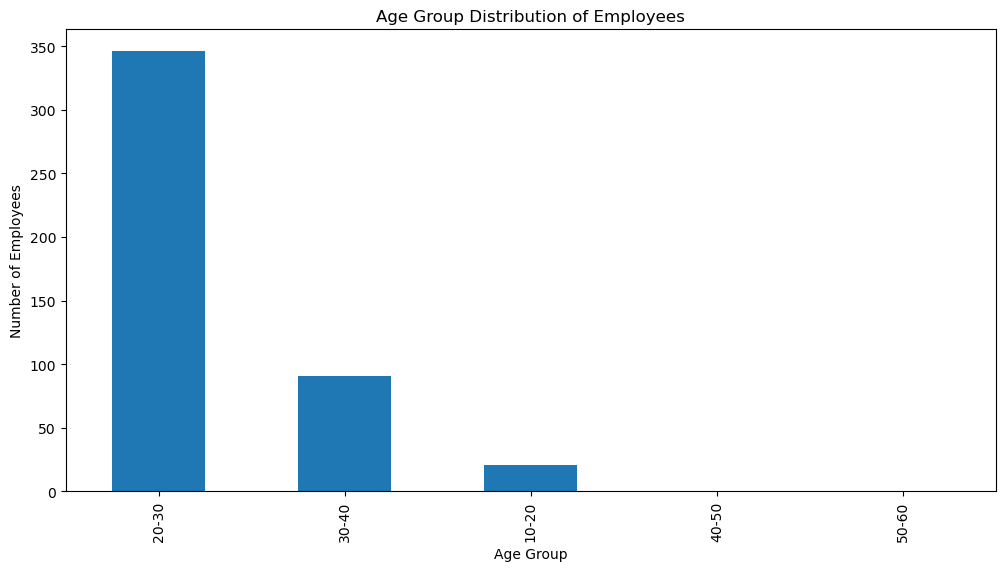

In [18]:
# Identify the predominant age group
age_groups = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60], labels=['10-20','20-30', '30-40', '40-50', '50-60'])
age_group_distribution = age_groups.value_counts()

# Plot the age group distribution
plt.figure(figsize=(12,6))
age_group_distribution.plot(kind='bar')
plt.title('Age Group Distribution of Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

4. Discover which team and position have the highest salary expenditure.

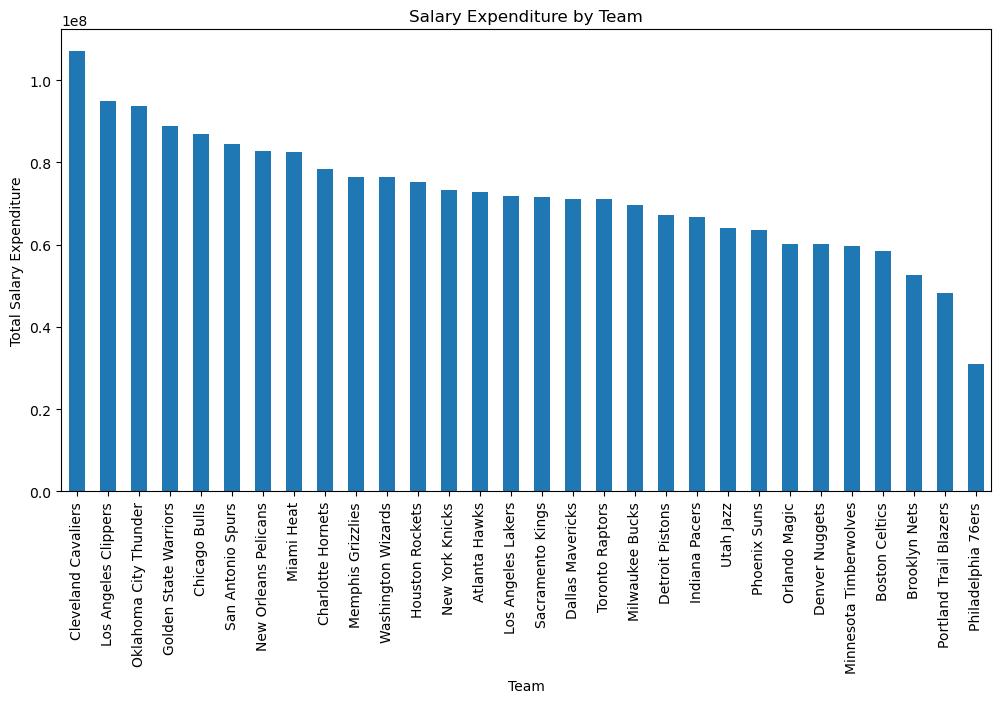

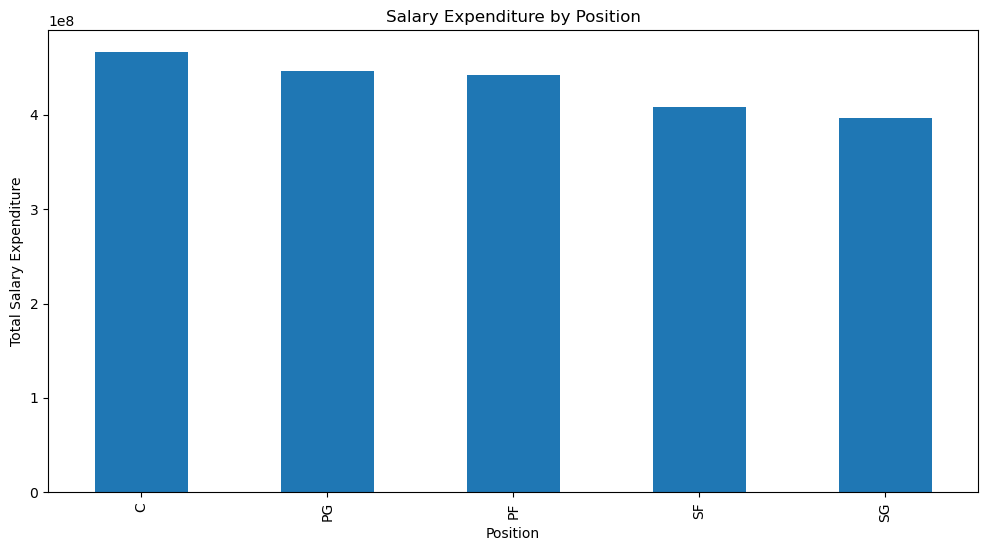

In [17]:
# Team with the highest salary expenditure
team_salary_expenditure = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

# Position with the highest salary expenditure
position_salary_expenditure = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Plot the team salary expenditure
plt.figure(figsize=(12,6))
team_salary_expenditure.plot(kind='bar')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.show()

# Plot the position salary expenditure
plt.figure(figsize=(12,6))
position_salary_expenditure.plot(kind='bar')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.show()

5. Investigate if there's any correlation between age and salary, and represent it visually.


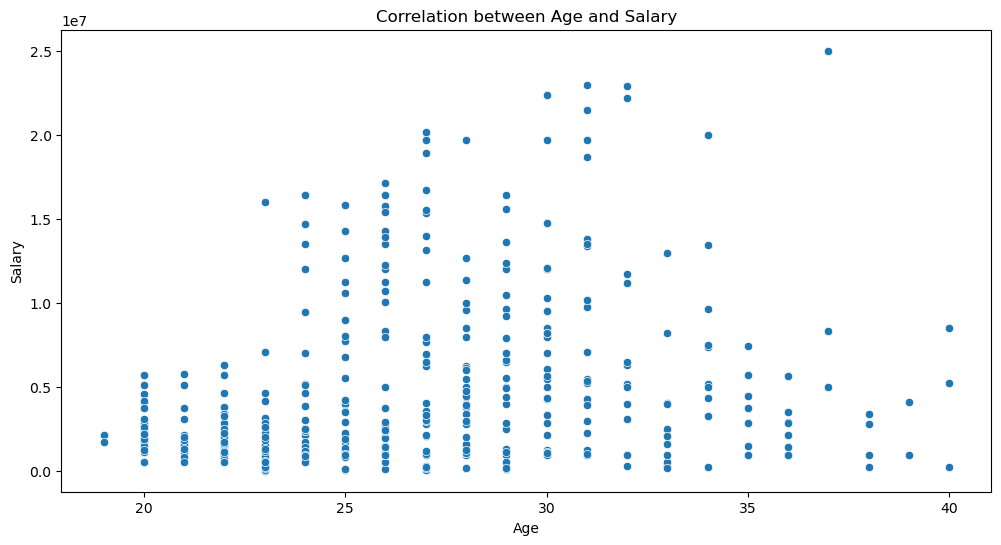

0.21400941226570955

In [19]:
# Correlation between age and salary
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Calculate correlation coefficient
correlation = df[['Age', 'Salary']].corr().iloc[0, 1]
correlation

# Data Story
## Insights Gained:

#### 1. Distribution of Employees Across Teams:
- **New Orleans Pelicans** have the highest number of employees, constituting `4.15%` of the total.
- **Memphis Grizzlies** follow with `3.93%` of the employees.
- **Utah Jazz**, **New York Knicks**, and **Milwaukee Bucks** each have `3.49%` of the employees.
- The rest of the teams have a similar percentage of employees, roughly around 3.28%, with a slight variation. The teams with the fewest employees, at `3.06%`, are **Orlando Magic** and **Minnesota Timberwolves**.

#### 2. Segregation by Positions:
- The position **SG** has the highest number of employees, indicating its importance within the company structure, with over 100 employees in this role.
- The position **PF** follows closely behind with around 100 employees.
- The position with the fewest employees is **C**, with just 80 employees.

#### 3. Predominant Age Group:
- The most common age group among employees is **20-30**.
- There are fewer than 50 employees in the **10-20** age group.
- No employees are above **40 years of age**.

#### 4. Highest Salary Expenditure:
- The team with the highest salary expenditure is the **Cleveland Cavaliers**.
- The position with the highest salary expenditure is **C**.

#### 5. Correlation Between Age and Salary
- There is a weak positive correlation between age and salary, with a correlation coefficient of **0.214**.
- This suggests that as employees get older, their salaries tend to increase slightly, but the relationship is not very strong. 
- The salaries peak around the age of **30**, suggesting that employees in this age range tend to earn higher salaries compared to their younger or older counterparts. 
- The spread of salaries is wide, indicating considerable variability in how salaries are distributed across different age groups.